In [86]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx import DiGraph
import numpy as np
import os
import random
import sys
from typing import List, Tuple

In [87]:
sys.path.append("../")
test_dir = os.path.abspath("../tests")
sys.path.append(test_dir)

In [88]:
from job_scheduler.model import Job, Operation, Schedule, ScheduledJob
from job_scheduler.optimizer import ScheduleOptimizer
from job_scheduler.scheduler import JobScheduler

# R3

In [95]:
job_1 = ScheduledJob(job_id=1, operations=[Operation(id=1, time=3), Operation(id=2, time=6)])
job_2 = ScheduledJob(job_id=2, operations=[Operation(id=1, time=10), Operation(id=2, time=1)])
job_3 = ScheduledJob(job_id=3, operations=[Operation(id=1, time=3), Operation(id=2, time=2)])
job_4 = ScheduledJob(job_id=4, operations=[Operation(id=1, time=2), Operation(id=2, time=4)])
job_5 = ScheduledJob(job_id=5, operations=[Operation(id=1, time=8), Operation(id=2, time=8)])

job_operations = [job_4, job_1, job_5, job_3, job_2]
job_operations

[ScheduledJob(job_id=4, operations=[Operation(id=1, time=2), Operation(id=2, time=4)]),
 ScheduledJob(job_id=1, operations=[Operation(id=1, time=3), Operation(id=2, time=6)]),
 ScheduledJob(job_id=5, operations=[Operation(id=1, time=8), Operation(id=2, time=8)]),
 ScheduledJob(job_id=3, operations=[Operation(id=1, time=3), Operation(id=2, time=2)]),
 ScheduledJob(job_id=2, operations=[Operation(id=1, time=10), Operation(id=2, time=1)])]

In [96]:
job_scheduler = JobScheduler(num_of_machines=2, num_ops_per_machine=2, scheduled_jobs=job_operations)
job_scheduler

In [97]:
schedule = job_scheduler.generate_schedule()
schedule

Schedule(jobs=[Job(id=4, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x13fb4b070>), Job(id=1, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x13fb4b1f0>), Job(id=5, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x13fb4b850>), Job(id=3, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x13fb4bf10>), Job(id=2, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x13eedb850>)], debug=False)

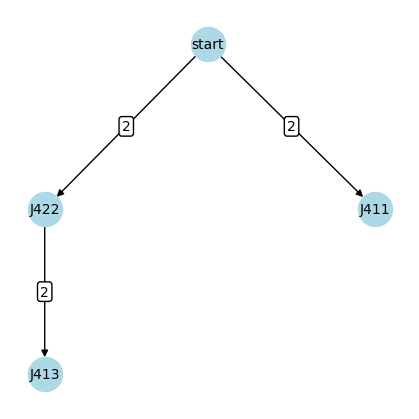

In [98]:
fig_size = (4, 4)
JobScheduler.visualize_schedule(schedule.jobs[0].operations, fig_size)

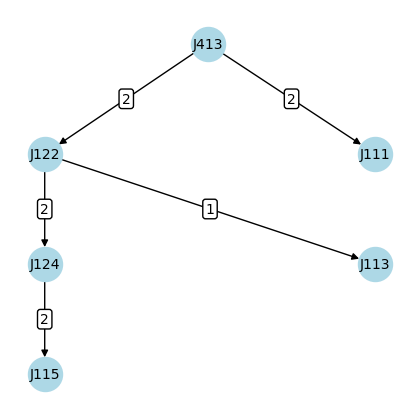

In [99]:
JobScheduler.visualize_schedule(schedule.jobs[1].operations, fig_size)

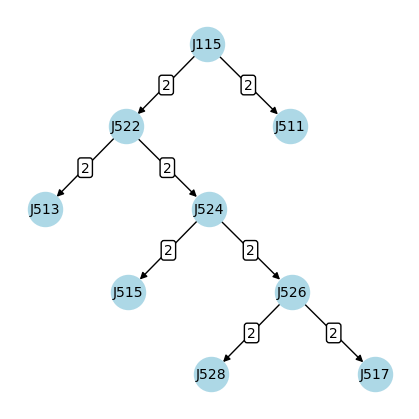

In [100]:
JobScheduler.visualize_schedule(schedule.jobs[2].operations, fig_size)

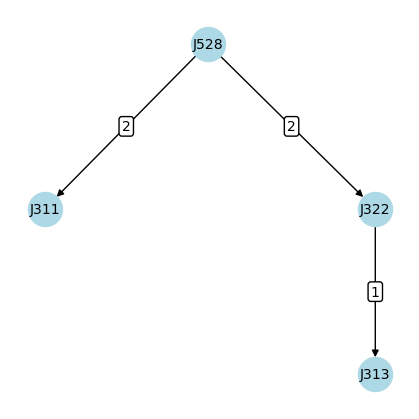

In [101]:
JobScheduler.visualize_schedule(schedule.jobs[3].operations, fig_size)

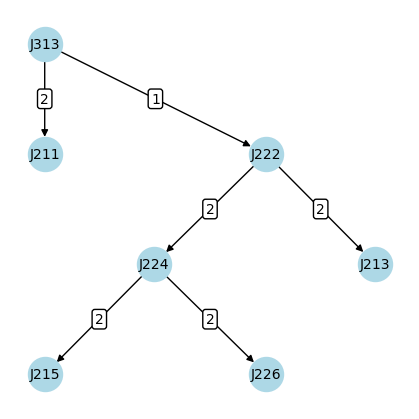

In [102]:
JobScheduler.visualize_schedule(schedule.jobs[4].operations, fig_size)

In [103]:
schedule.compute_makespan()

27

In [104]:
schedule_optimzer = ScheduleOptimizer(scheduled_jobs=job_operations,
                                      num_of_machines=2,
                                      num_ops_per_machine=2)
schedule_optimzer

In [105]:
print(f"New Schedule makespan: {schedule_optimzer.optimize()}")

New Schedule makespan: 27


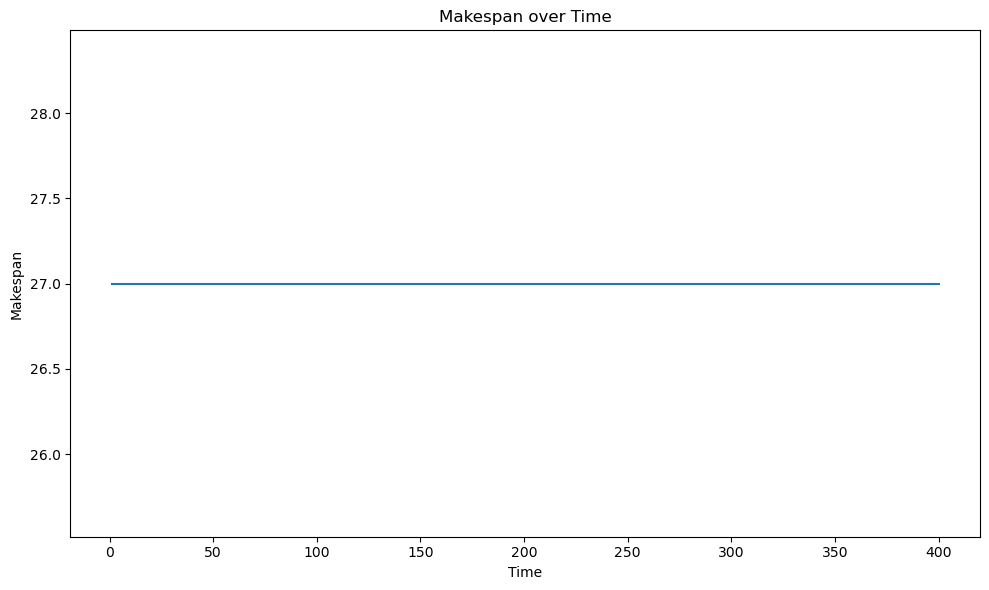

In [106]:
schedule_optimzer.plot_make_span()

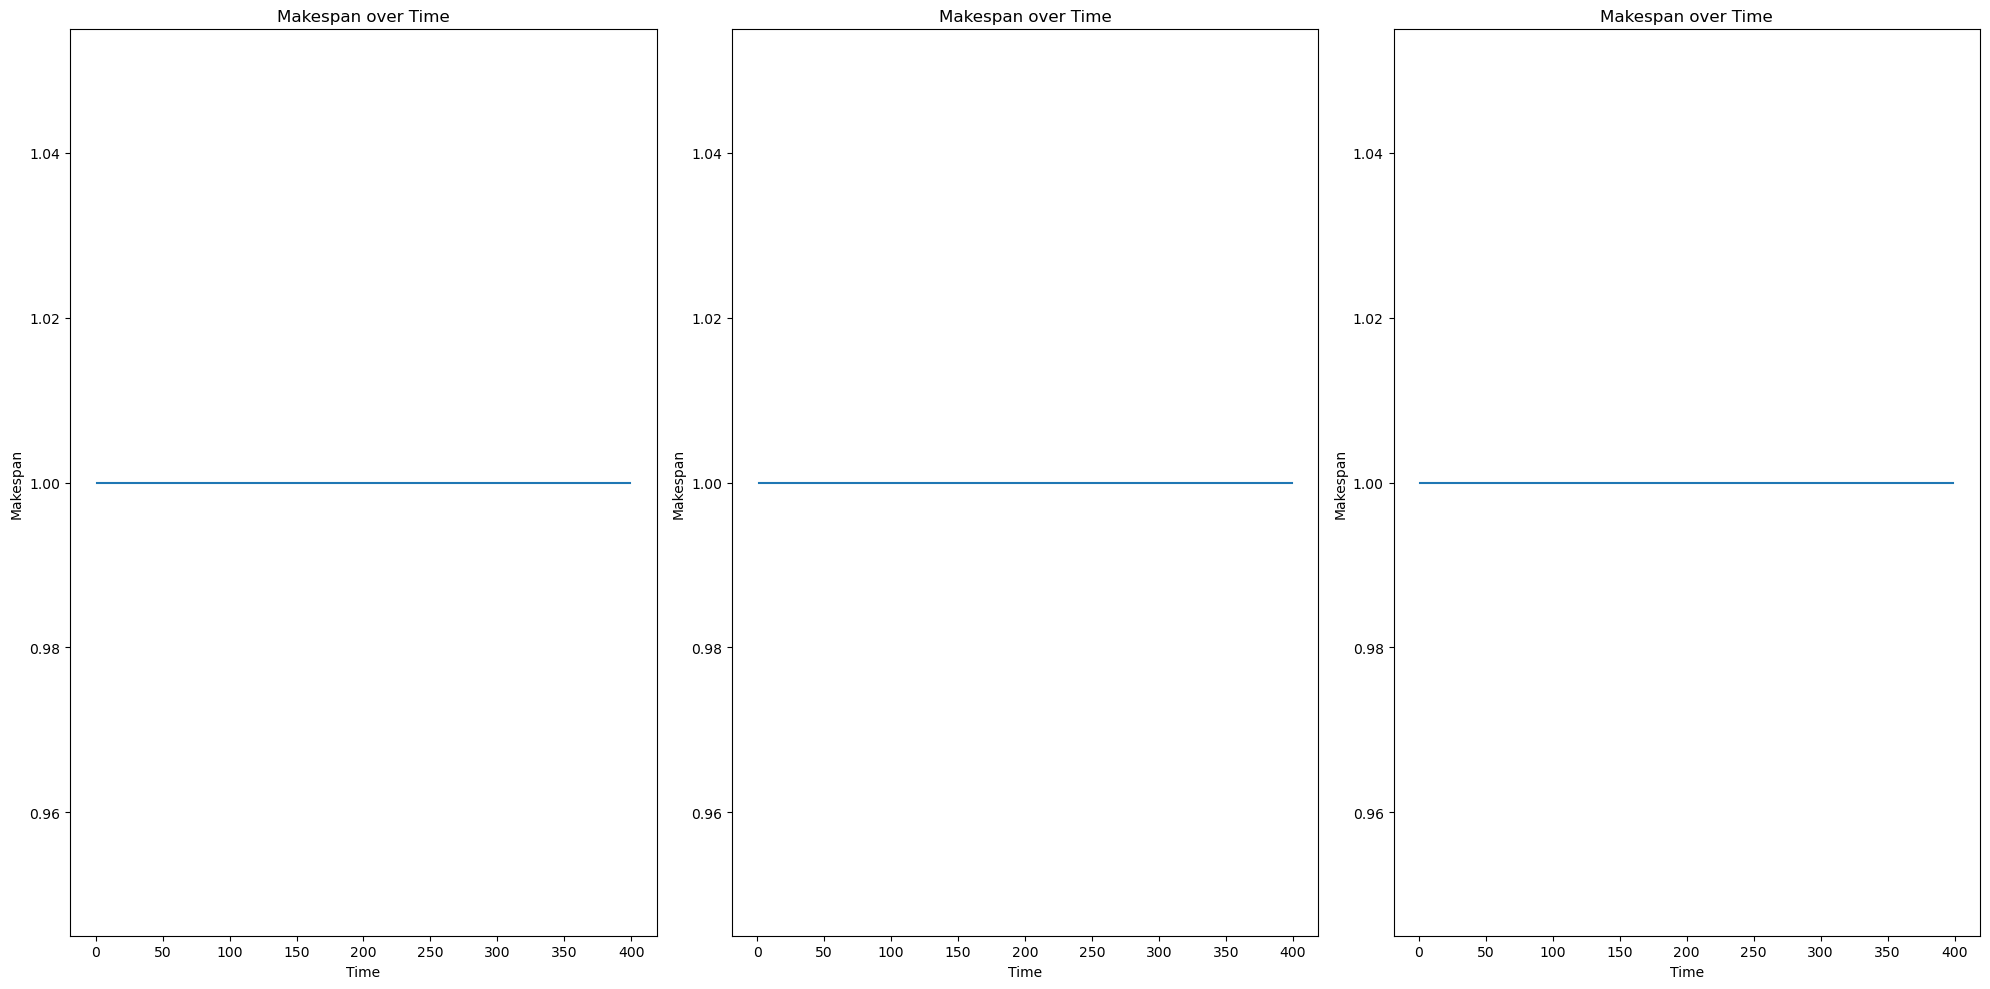

In [107]:
schedule_optimzer.plot_boltzmann_distributon()

# R4

In [108]:
num_of_jobs=50
num_of_machines=5
num_ops_per_machine=3

In [109]:
scheduled_jobs = JobScheduler.generate_scheduled_jobs(num_of_jobs=num_of_jobs,
                                                      num_of_operations_per_job=num_ops_per_machine)

job_scheduler = JobScheduler(scheduled_jobs=scheduled_jobs,
                             num_of_machines=num_of_machines,
                             num_ops_per_machine=num_ops_per_machine)

schedule = job_scheduler.generate_schedule()

schedule.compute_makespan()

489

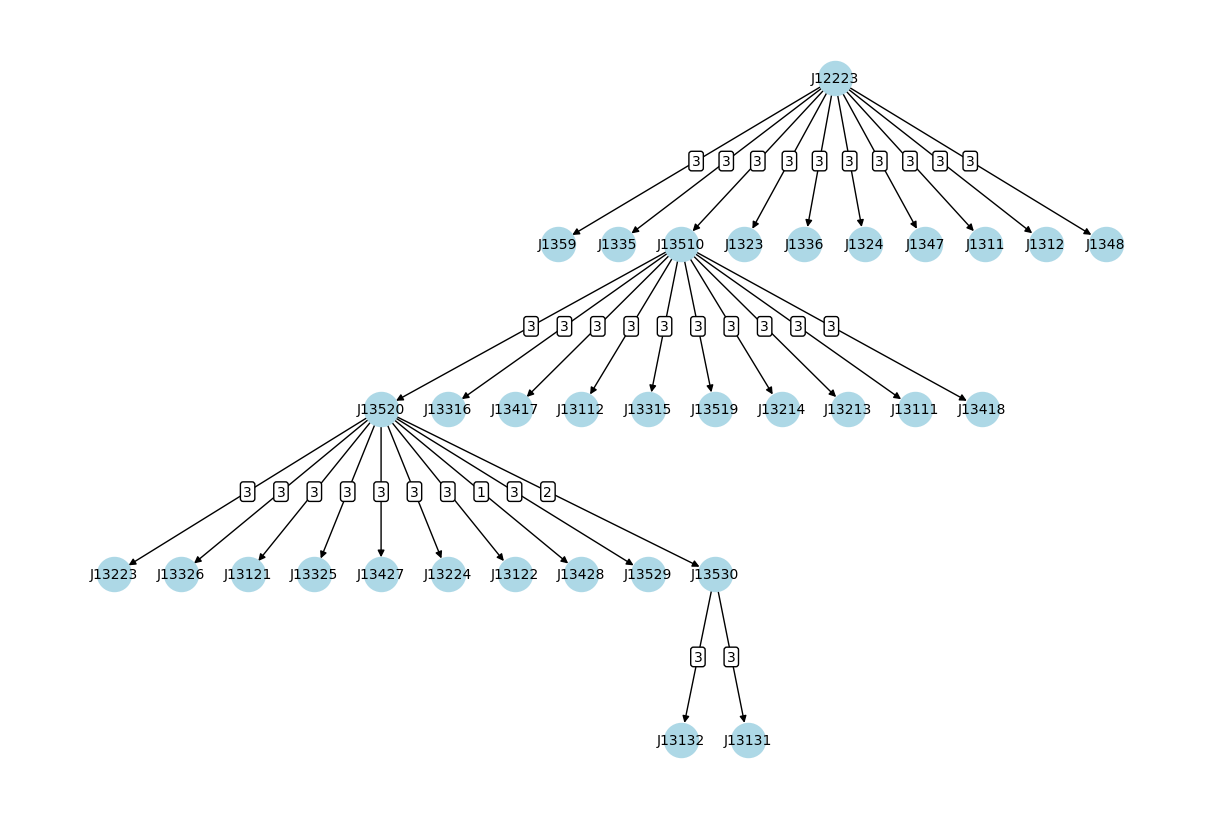

In [110]:
# Random job
JobScheduler.visualize_schedule(schedule.jobs[random.choice(range(0, num_of_jobs))].operations)

In [111]:
schedule_optimzer = ScheduleOptimizer(scheduled_jobs=scheduled_jobs,
                                      num_of_machines=num_of_machines,
                                      num_ops_per_machine=num_ops_per_machine)
schedule_optimzer

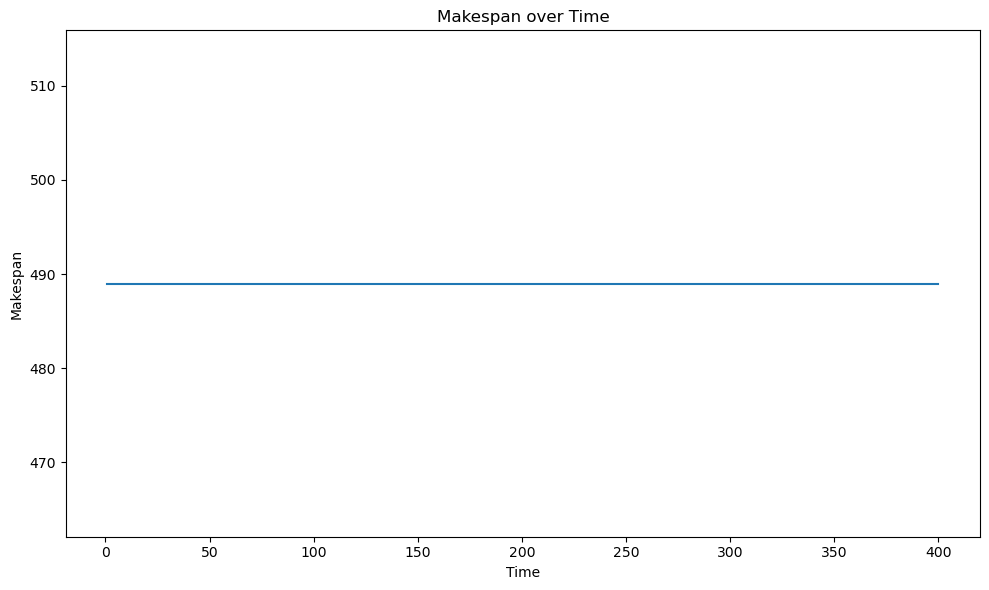

In [112]:
schedule_optimzer.plot_make_span()

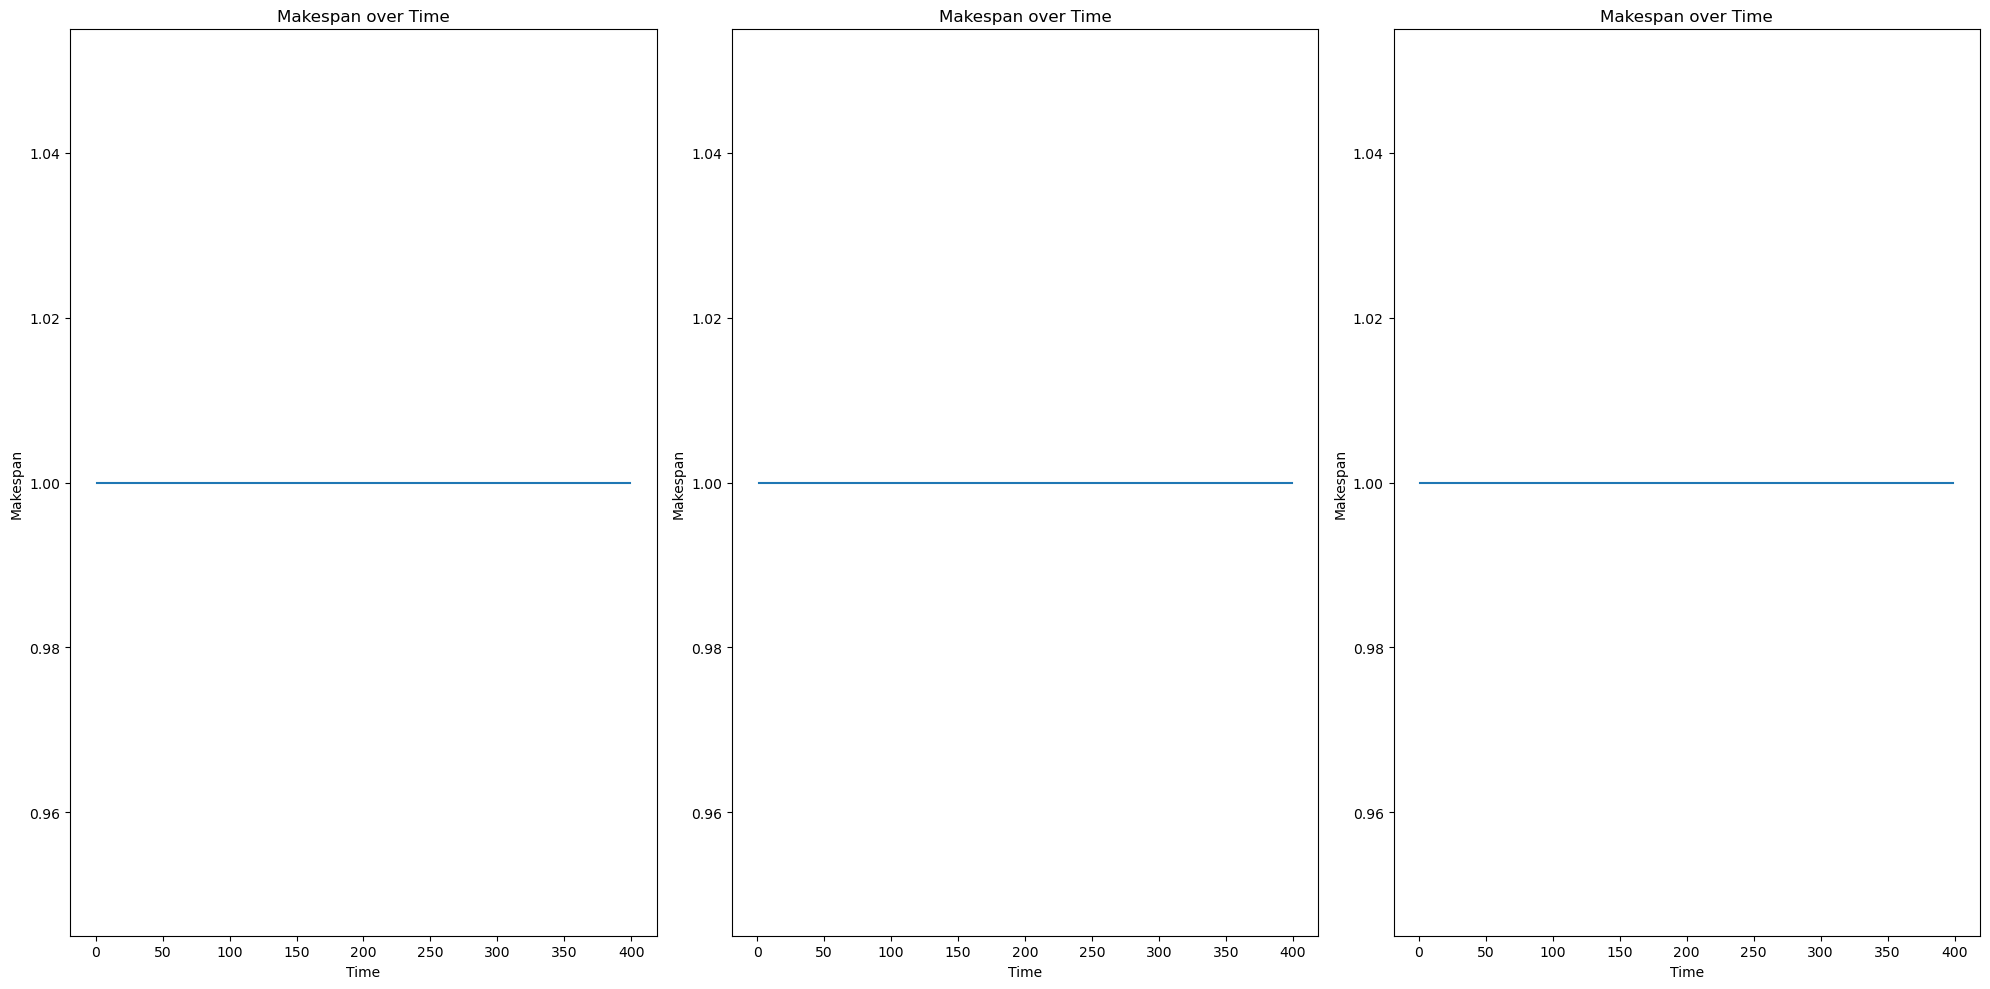

In [113]:
schedule_optimzer.plot_boltzmann_distributon()

In [114]:
for trial in range(1, 4):
    scheduled_jobs = JobScheduler.generate_scheduled_jobs(num_of_jobs=num_of_jobs,
                                                          num_of_operations_per_job=num_ops_per_machine)
    
    job_scheduler = JobScheduler(scheduled_jobs=scheduled_jobs,
                                 num_of_machines=num_of_machines,
                                 num_ops_per_machine=num_ops_per_machine)
    
    schedule = job_scheduler.generate_schedule()
    
    print(f"Trial {trial} -> {schedule.compute_makespan()}")

Trial 1 -> 511
Trial 2 -> 471
Trial 3 -> 509


# R5

In [115]:
num_of_jobs=50
num_of_machines=3
num_ops_per_machine=5

In [116]:
scheduled_jobs = JobScheduler.generate_scheduled_jobs(num_of_jobs=num_of_jobs,
                                                      num_of_operations_per_job=num_ops_per_machine)

job_scheduler = JobScheduler(scheduled_jobs=scheduled_jobs,
                             num_of_machines=num_of_machines,
                             num_ops_per_machine=num_ops_per_machine)

schedule = job_scheduler.generate_schedule()

schedule.compute_makespan()

719

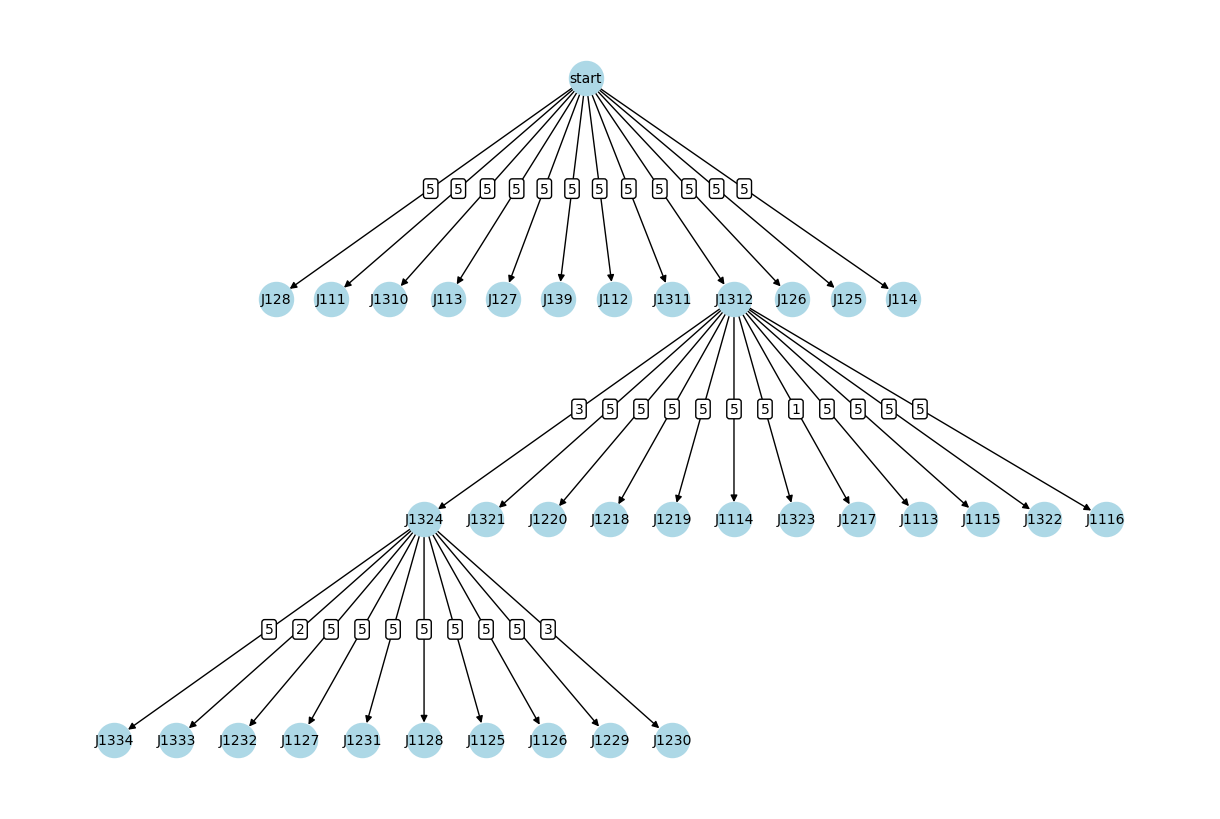

In [117]:
JobScheduler.visualize_schedule(schedule.jobs[random.choice(range(0, num_of_jobs))].operations)

In [118]:
schedule_optimzer = ScheduleOptimizer(scheduled_jobs=scheduled_jobs,
                                      num_of_machines=num_of_machines,
                                      num_ops_per_machine=num_ops_per_machine)
schedule_optimzer

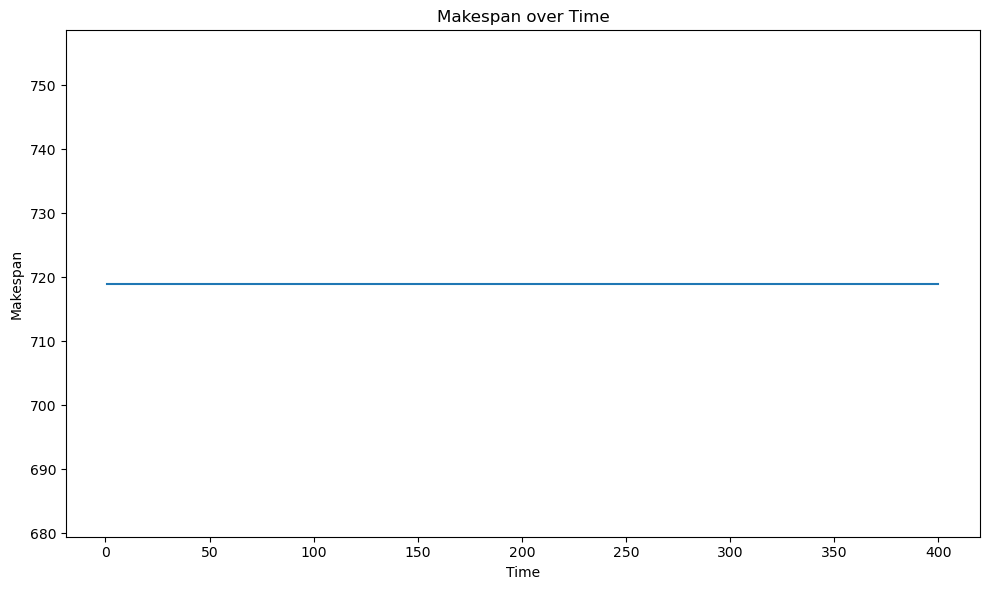

In [119]:
schedule_optimzer.plot_make_span()

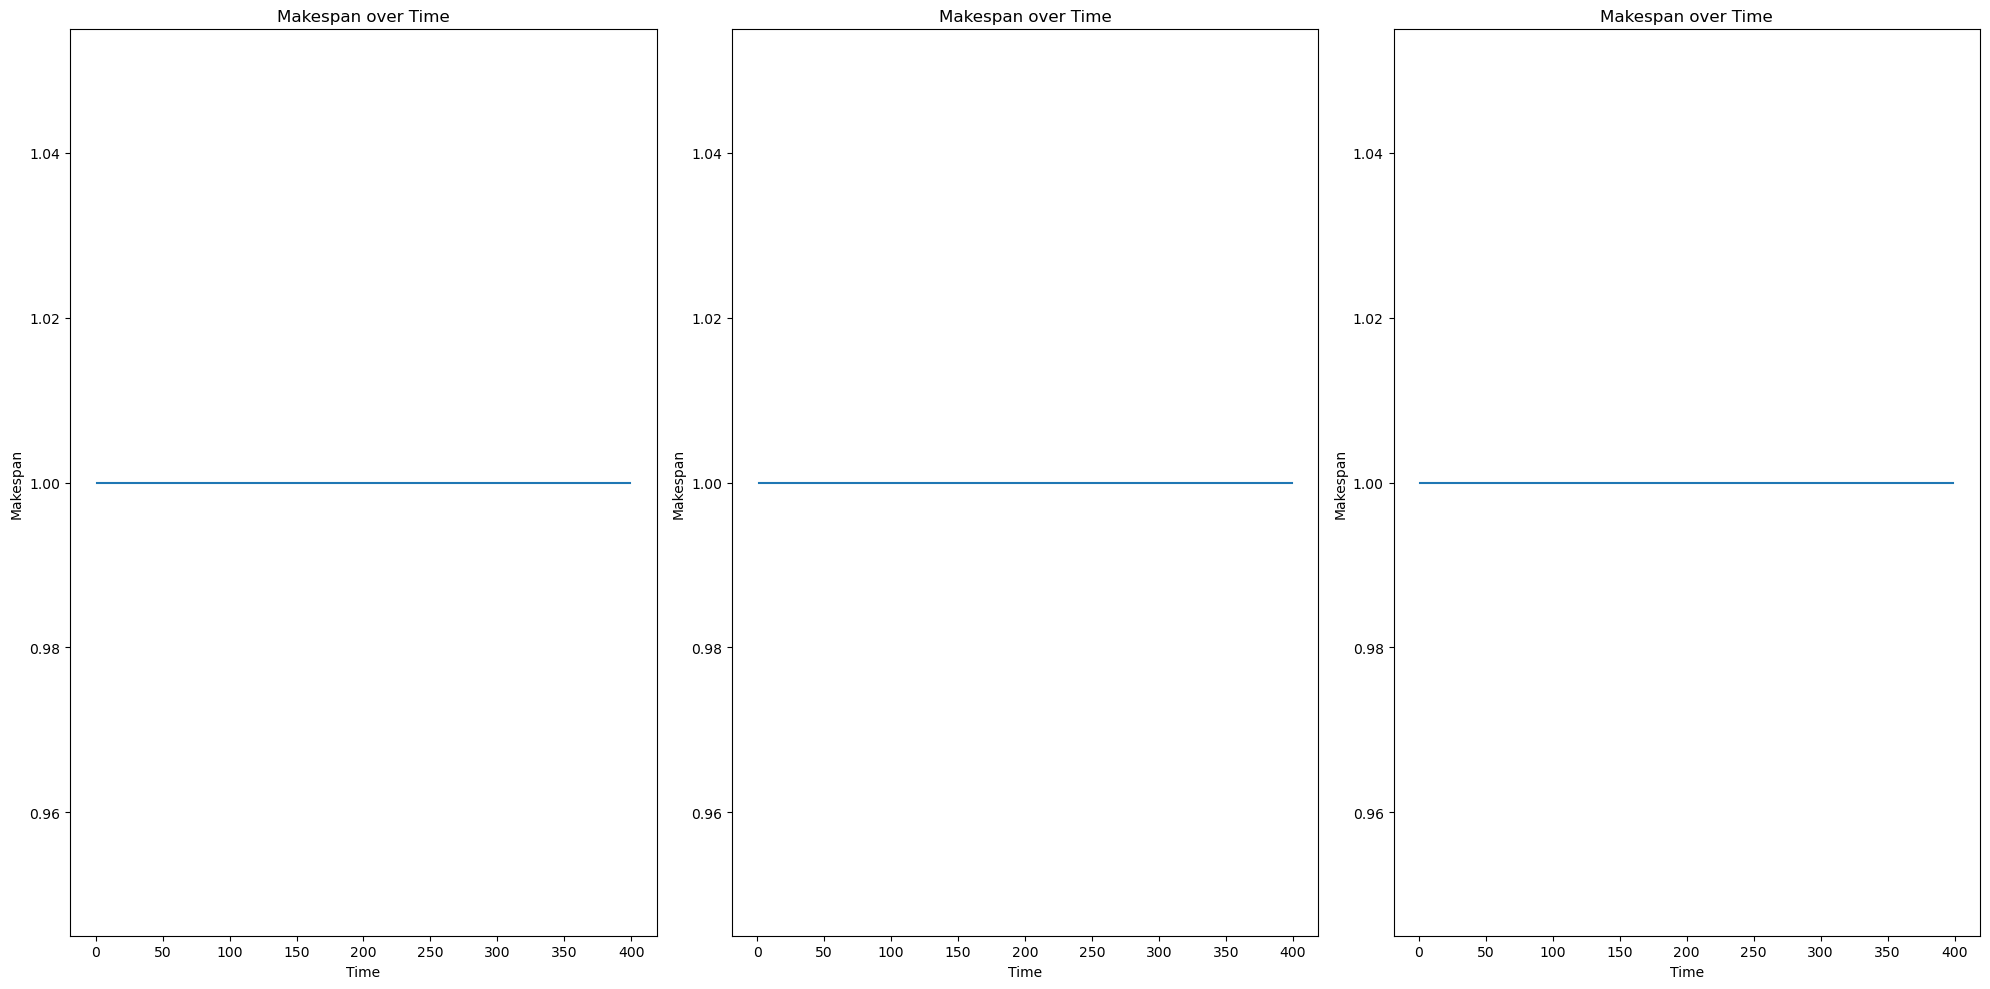

In [120]:
schedule_optimzer.plot_boltzmann_distributon()

In [121]:
for trial in range(1, 4):
    scheduled_jobs = JobScheduler.generate_scheduled_jobs(num_of_jobs=num_of_jobs,
                                                          num_of_operations_per_job=num_ops_per_machine)
    
    job_scheduler = JobScheduler(scheduled_jobs=scheduled_jobs,
                                 num_of_machines=num_of_machines,
                                 num_ops_per_machine=num_ops_per_machine)
    
    schedule = job_scheduler.generate_schedule()
    
    print(f"Trial {trial} -> {schedule.compute_makespan()}")

Trial 1 -> 740
Trial 2 -> 750
Trial 3 -> 717
